In [22]:
import numpy as np
import matplotlib.pyplot as plt

from expectation.confseq.confidencesequence import *

### Create a helper plot function

In [3]:
def plot_confidence_sequence(
    cs_results: list, 
    true_mean: Optional[float] = None,
    title: str = "Confidence Sequence Results"
) -> None:
    """Helper to plot confidence sequence results."""
    samples = [r.sample_size for r in cs_results]
    lowers = [r.lower for r in cs_results]
    uppers = [r.upper for r in cs_results]
    means = [r.state.running_mean for r in cs_results]
    
    plt.figure(figsize=(12, 6))
    plt.fill_between(samples, lowers, uppers, alpha=0.2, label="Confidence Bounds")
    plt.plot(samples, means, 'b-', label="Sample Mean")
    if true_mean is not None:
        plt.axhline(y=true_mean, color='r', linestyle='--', label="True Mean")
    plt.xscale('log')
    plt.xlabel("Sample Size")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


### Example 1: Basic usage with normal mixture boundary


Example 1: Normal Mixture Boundary with Gaussian Data
After 25 samples:
  Mean estimate: 0.336
  Confidence interval: [-0.540, 1.213]
After 50 samples:
  Mean estimate: 0.275
  Confidence interval: [-0.310, 0.859]
After 75 samples:
  Mean estimate: 0.385
  Confidence interval: [-0.096, 0.866]
After 100 samples:
  Mean estimate: 0.396
  Confidence interval: [0.003, 0.789]
After 125 samples:
  Mean estimate: 0.428
  Confidence interval: [0.069, 0.786]
After 150 samples:
  Mean estimate: 0.418
  Confidence interval: [0.088, 0.748]
After 175 samples:
  Mean estimate: 0.450
  Confidence interval: [0.149, 0.751]
After 200 samples:
  Mean estimate: 0.459
  Confidence interval: [0.178, 0.741]
After 225 samples:
  Mean estimate: 0.497
  Confidence interval: [0.222, 0.773]
After 250 samples:
  Mean estimate: 0.498
  Confidence interval: [0.237, 0.758]


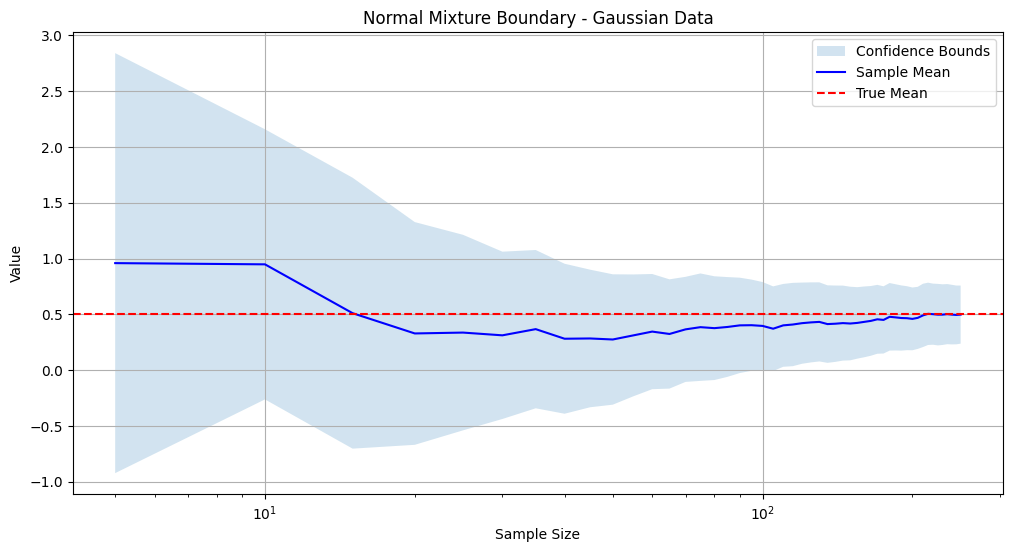

In [23]:
def example_normal_mixture():
    """Demonstrate basic confidence sequence with Gaussian data."""
    print("\nExample 1: Normal Mixture Boundary with Gaussian Data")
    
    # Configure confidence sequence
    config = ConfidenceSequenceConfig(
        alpha=0.05,
        boundary_type=BoundaryType.NORMAL_MIXTURE,
        rho=1.0  # Tuned for sample size around 100
    )
    cs = ConfidenceSequence(config=config)
    
    # Generate data and update sequentially
    true_mean = 0.5
    np.random.seed(42)
    results = []
    
    for t in range(50):  # 20 batches
        # Generate batch of observations
        batch_size = 5
        data = np.random.normal(true_mean, 1.0, size=batch_size)
        
        # Update confidence sequence
        result = cs.update(data)
        results.append(result)
        
        # Print updates periodically
        if (t+1) % 5 == 0:
            print(f"After {result.sample_size} samples:")
            print(f"  Mean estimate: {result.state.running_mean:.3f}")
            print(f"  Confidence interval: [{result.lower:.3f}, {result.upper:.3f}]")
    
    plot_confidence_sequence(results, true_mean, "Normal Mixture Boundary - Gaussian Data")


example_normal_mixture()

### Example 2: Empirical Bernstein bound with bounded data


Example 2: Empirical Bernstein with Bounded Data
After 25 samples:
  Mean estimate: 0.704
  Confidence interval: [0.485, 0.923]
  Variance estimate: 0.012
After 50 samples:
  Mean estimate: 0.685
  Confidence interval: [0.553, 0.816]
  Variance estimate: 0.014
After 75 samples:
  Mean estimate: 0.698
  Confidence interval: [0.600, 0.797]
  Variance estimate: 0.015
After 100 samples:
  Mean estimate: 0.688
  Confidence interval: [0.606, 0.769]
  Variance estimate: 0.016
After 125 samples:
  Mean estimate: 0.684
  Confidence interval: [0.613, 0.755]
  Variance estimate: 0.017
After 150 samples:
  Mean estimate: 0.692
  Confidence interval: [0.629, 0.755]
  Variance estimate: 0.017
After 175 samples:
  Mean estimate: 0.691
  Confidence interval: [0.635, 0.747]
  Variance estimate: 0.016
After 200 samples:
  Mean estimate: 0.693
  Confidence interval: [0.642, 0.744]
  Variance estimate: 0.016
After 225 samples:
  Mean estimate: 0.694
  Confidence interval: [0.647, 0.741]
  Variance estima

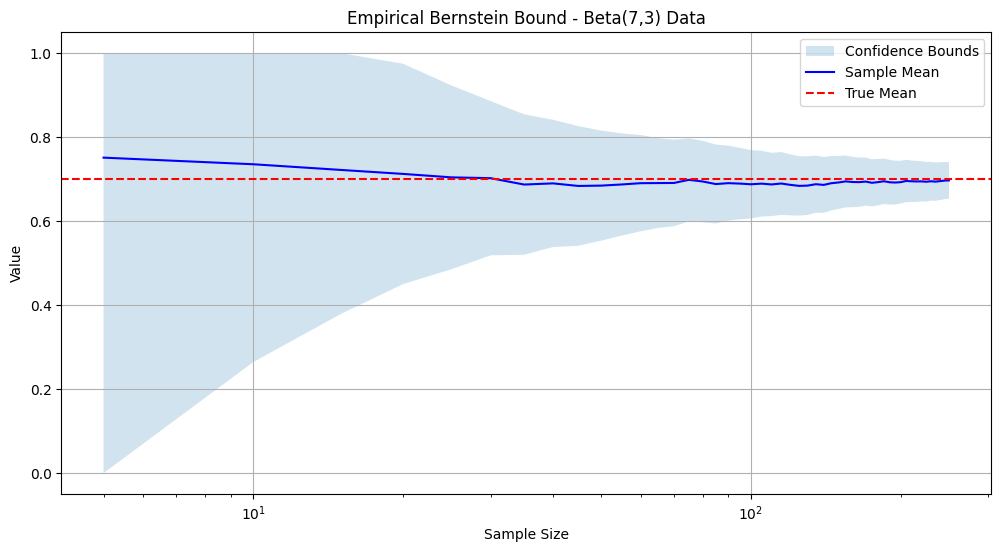

In [24]:
def example_empirical_bernstein():
    """Demonstrate empirical Bernstein confidence sequence with bounded data."""
    print("\nExample 2: Empirical Bernstein with Bounded Data")
    
    # Configure confidence sequence
    config = EmpiricalBernsteinConfig(
        alpha=0.05,
        boundary_type=BoundaryType.GAMMA_EXPONENTIAL,
        rho=2.0,
        lower_bound=0.0,
        upper_bound=1.0
    )
    cs = EmpiricalBernsteinConfidenceSequence(config=config)
    
    # Generate data and update sequentially
    true_mean = 0.7
    np.random.seed(42)
    results = []
    
    for t in range(50):  # 20 batches
        # Generate batch of bounded observations
        batch_size = 5
        data = np.random.beta(7, 3, size=batch_size)  # Beta distribution with mean 0.7
        
        # Update confidence sequence
        result = cs.update(data)
        results.append(result)
        
        # Print updates periodically
        if (t+1) % 5 == 0:
            print(f"After {result.sample_size} samples:")
            print(f"  Mean estimate: {result.state.running_mean:.3f}")
            print(f"  Confidence interval: [{result.lower:.3f}, {result.upper:.3f}]")
            if result.state.variance_estimate is not None:
                print(f"  Variance estimate: {result.state.variance_estimate:.3f}")
    
    plot_confidence_sequence(results, true_mean, "Empirical Bernstein Bound - Beta(7,3) Data")

example_empirical_bernstein()

### Example 3: Asymmetric bounded data with beta-binomial boundary


Example 3: Beta-Binomial Boundary with Skewed Data
After 25 samples:
  Mean estimate: 0.194
  Confidence interval: [-0.016, 0.404]
After 50 samples:
  Mean estimate: 0.181
  Confidence interval: [0.055, 0.307]
After 75 samples:
  Mean estimate: 0.184
  Confidence interval: [0.088, 0.279]
After 100 samples:
  Mean estimate: 0.181
  Confidence interval: [0.105, 0.257]
After 125 samples:
  Mean estimate: 0.189
  Confidence interval: [0.124, 0.254]
After 150 samples:
  Mean estimate: 0.185
  Confidence interval: [0.129, 0.242]
After 175 samples:
  Mean estimate: 0.189
  Confidence interval: [0.138, 0.240]
After 200 samples:
  Mean estimate: 0.190
  Confidence interval: [0.143, 0.238]
After 225 samples:
  Mean estimate: 0.191
  Confidence interval: [0.147, 0.235]
After 250 samples:
  Mean estimate: 0.192
  Confidence interval: [0.152, 0.233]


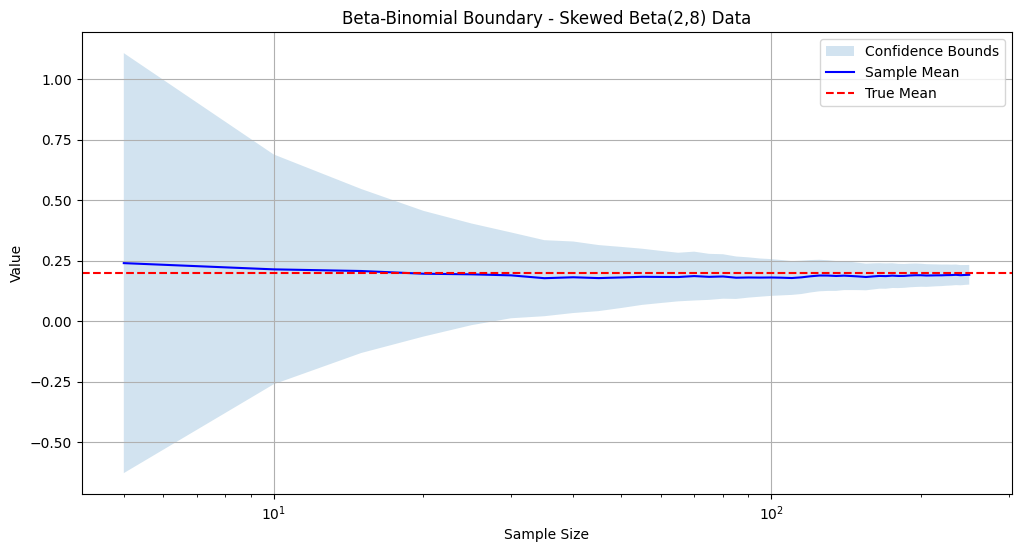

In [ ]:
def example_beta_binomial():
    """Demonstrate beta-binomial boundary with skewed bounded data."""
    print("\nExample 3: Beta-Binomial Boundary with Skewed Data")
    
    # Configure confidence sequence
    config = ConfidenceSequenceConfig(
        alpha=0.05,
        boundary_type=BoundaryType.BETA_BINOMIAL,
        rho=1.5
    )
    cs = ConfidenceSequence(config=config)
    
    # Generate data and update sequentially
    true_mean = 0.2  # Highly skewed
    np.random.seed(42)
    results = []
    
    for t in range(50):  # 20 batches
        # Generate batch of skewed observations
        batch_size = 5
        data = np.random.beta(2, 8, size=batch_size)  # Skewed beta distribution
        
        # Update confidence sequence
        result = cs.update(data)
        results.append(result)
        
        # Print updates periodically
        if (t+1) % 5 == 0:
            print(f"After {result.sample_size} samples:")
            print(f"  Mean estimate: {result.state.running_mean:.3f}")
            print(f"  Confidence interval: [{result.lower:.3f}, {result.upper:.3f}]")
    
    plot_confidence_sequence(results, true_mean, "Beta-Binomial Boundary - Skewed Beta(2,8) Data")

example_beta_binomial()

### Example 4: Polynomial stitching boundary with heavy-tailed data


Example 4: Polynomial Stitching Boundary with Heavy-Tailed Data
After 25 samples:
  Mean estimate: 0.797
  Confidence interval: [-0.192, 1.787]
  Variance estimate: 1.950
After 50 samples:
  Mean estimate: 0.811
  Confidence interval: [0.210, 1.412]
  Variance estimate: 1.406
After 75 samples:
  Mean estimate: 0.775
  Confidence interval: [0.297, 1.253]
  Variance estimate: 1.304
After 100 samples:
  Mean estimate: 0.836
  Confidence interval: [0.420, 1.252]
  Variance estimate: 1.293
After 125 samples:
  Mean estimate: 0.958
  Confidence interval: [0.562, 1.354]
  Variance estimate: 1.435
After 150 samples:
  Mean estimate: 0.993
  Confidence interval: [0.607, 1.379]
  Variance estimate: 1.607
After 175 samples:
  Mean estimate: 1.009
  Confidence interval: [0.649, 1.369]
  Variance estimate: 1.611
After 200 samples:
  Mean estimate: 0.962
  Confidence interval: [0.626, 1.297]
  Variance estimate: 1.584
After 225 samples:
  Mean estimate: 0.987
  Confidence interval: [0.657, 1.316]
 

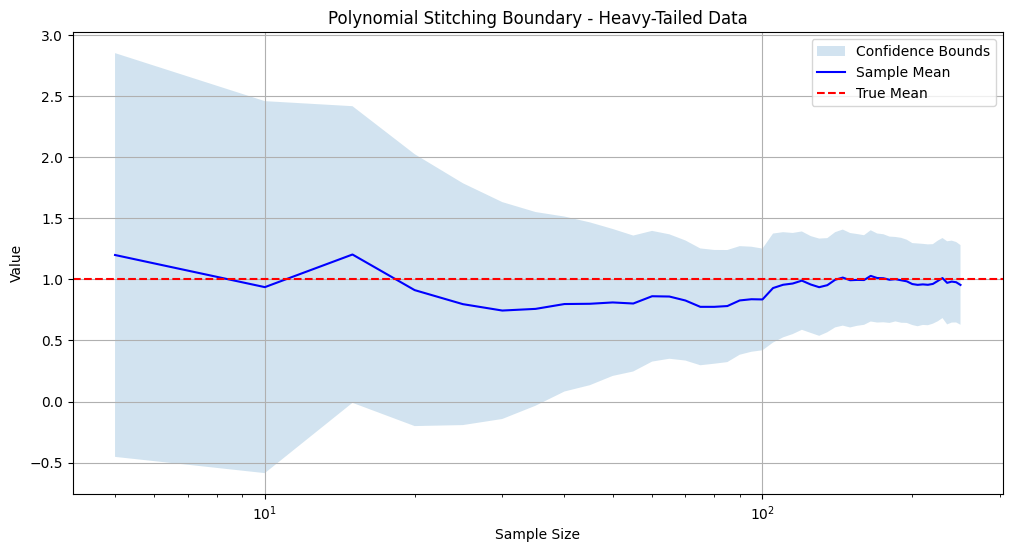

In [25]:
def example_poly_stitching():
    """Demonstrate polynomial stitching boundary with heavy-tailed data."""
    print("\nExample 4: Polynomial Stitching Boundary with Heavy-Tailed Data")
    
    # Configure confidence sequence with polynomial stitching
    config = ConfidenceSequenceConfig(
        alpha=0.05,
        boundary_type=BoundaryType.POLY_STITCHING,
        v_opt=1.0,  # Initial variance estimate
        c=0.1,      # Small c for tighter bounds
        alpha_opt=0.05
    )
    cs = ConfidenceSequence(config=config)
    
    # Generate data and update sequentially
    true_mean = 1.0
    np.random.seed(42)
    results = []
    
    for t in range(50):  # 50 batches
        # Generate batch of heavy-tailed observations (Student's t with 3 df)
        batch_size = 5
        data = true_mean + np.random.standard_t(df=3, size=batch_size)
        
        # Update confidence sequence
        result = cs.update(data)
        results.append(result)
        
        # Print updates periodically
        if (t+1) % 5 == 0:
            print(f"After {result.sample_size} samples:")
            print(f"  Mean estimate: {result.state.running_mean:.3f}")
            print(f"  Confidence interval: [{result.lower:.3f}, {result.upper:.3f}]")
            if result.state.variance_estimate is not None:
                print(f"  Variance estimate: {result.state.variance_estimate:.3f}")
    
    plot_confidence_sequence(results, true_mean, 
                           "Polynomial Stitching Boundary - Heavy-Tailed Data")
    
example_poly_stitching()


### Example 5: Discrete mixture boundary with mixture distribution


Example 5: Discrete Mixture Boundary with Mixture Distribution
After 25 samples:
  Mean estimate: 1.472
  Confidence interval: [0.533, 2.411]
  Variance estimate: 1.213
After 50 samples:
  Mean estimate: 1.449
  Confidence interval: [0.823, 2.075]
  Variance estimate: 1.131
After 75 samples:
  Mean estimate: 1.365
  Confidence interval: [0.840, 1.890]
  Variance estimate: 1.221
After 100 samples:
  Mean estimate: 1.410
  Confidence interval: [0.962, 1.859]
  Variance estimate: 1.197
After 125 samples:
  Mean estimate: 1.372
  Confidence interval: [0.980, 1.765]
  Variance estimate: 1.151
After 150 samples:
  Mean estimate: 1.401
  Confidence interval: [1.045, 1.757]
  Variance estimate: 1.140
After 175 samples:
  Mean estimate: 1.460
  Confidence interval: [1.137, 1.784]
  Variance estimate: 1.097
After 200 samples:
  Mean estimate: 1.444
  Confidence interval: [1.147, 1.741]
  Variance estimate: 1.058
After 225 samples:
  Mean estimate: 1.392
  Confidence interval: [1.105, 1.678]
  V

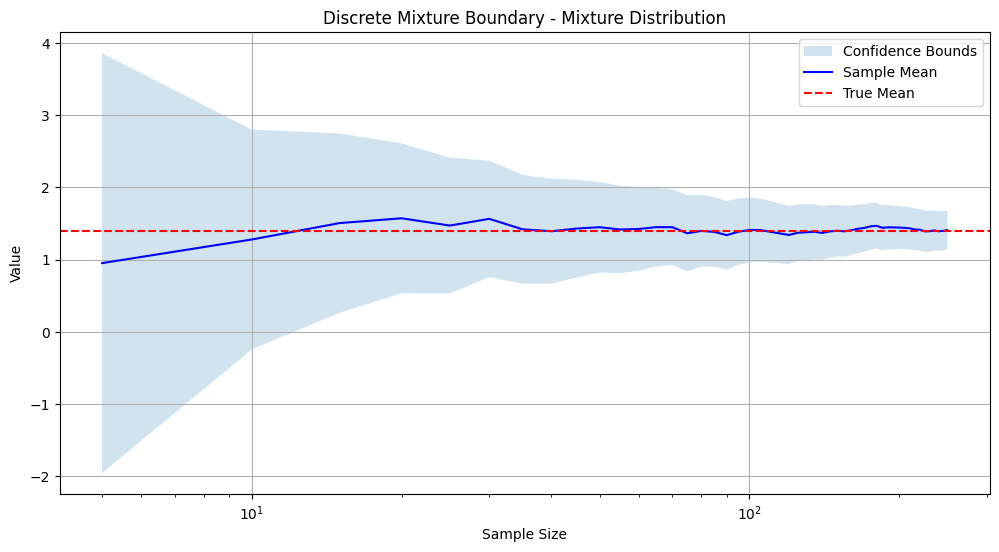

In [26]:
def example_discrete_mixture():
    """Demonstrate discrete mixture boundary with mixture distribution data."""
    print("\nExample 5: Discrete Mixture Boundary with Mixture Distribution")
    
    # Configure confidence sequence with discrete mixture
    config = ConfidenceSequenceConfig(
        alpha=0.05,
        boundary_type=BoundaryType.DISCRETE_MIXTURE,
        v_opt=2.0,  # Larger initial variance for mixture
        c=1.0,
        alpha_opt=0.05
    )
    cs = ConfidenceSequence(config=config)
    
    # Generate data and update sequentially
    # True mean is 0.3 * 0 + 0.7 * 2 = 1.4
    true_mean = 1.4
    np.random.seed(42)
    results = []
    
    for t in range(50):  # 50 batches
        # Generate batch from mixture distribution
        batch_size = 5
        # Mixture of two normal distributions
        mixture_indicators = np.random.binomial(1, 0.7, size=batch_size)
        data = np.where(mixture_indicators == 1, 
                       np.random.normal(2, 0.5, size=batch_size),  # Component 1
                       np.random.normal(0, 0.5, size=batch_size))  # Component 2
        
        # Update confidence sequence
        result = cs.update(data)
        results.append(result)
        
        # Print updates periodically
        if (t+1) % 5 == 0:
            print(f"After {result.sample_size} samples:")
            print(f"  Mean estimate: {result.state.running_mean:.3f}")
            print(f"  Confidence interval: [{result.lower:.3f}, {result.upper:.3f}]")
            if result.state.variance_estimate is not None:
                print(f"  Variance estimate: {result.state.variance_estimate:.3f}")
    
    plot_confidence_sequence(results, true_mean, 
                           "Discrete Mixture Boundary - Mixture Distribution")
    
example_discrete_mixture()

### Example 6: Combined comparison of different boundaries

In [27]:
def compare_boundaries():
    """Compare different boundary types on the same data."""
    print("\nExample 6: Comparison of Different Boundary Types")
    
    # Set up configurations for different boundaries
    configs = {
        "Normal Mixture": ConfidenceSequenceConfig(
            alpha=0.05, boundary_type=BoundaryType.NORMAL_MIXTURE),
        "Poly Stitching": ConfidenceSequenceConfig(
            alpha=0.05, boundary_type=BoundaryType.POLY_STITCHING),
        "Beta Binomial": ConfidenceSequenceConfig(
            alpha=0.05, boundary_type=BoundaryType.BETA_BINOMIAL),
        "Discrete Mixture": ConfidenceSequenceConfig(
            alpha=0.05, boundary_type=BoundaryType.DISCRETE_MIXTURE)
    }
    
    # Initialize confidence sequences
    cs_dict = {name: ConfidenceSequence(config=config) 
               for name, config in configs.items()}
    
    # Generate data and update all sequences
    true_mean = 0.5
    np.random.seed(42)
    results_dict = {name: [] for name in configs.keys()}
    
    for t in range(50):  # 50 batches
        # Generate batch of observations
        batch_size = 5
        data = np.random.normal(true_mean, 1.0, size=batch_size)
        
        # Update all confidence sequences
        for name, cs in cs_dict.items():
            result = cs.update(data)
            results_dict[name].append(result)
            
        # Print updates periodically
        if (t+1) % 10 == 0:
            print(f"\nAfter {(t+1)*batch_size} samples:")
            for name, results in results_dict.items():
                result = results[-1]
                print(f"{name}:")
                print(f"  CI: [{result.lower:.3f}, {result.upper:.3f}]")
                print(f"  Width: {result.upper - result.lower:.3f}")
    
    # Plot comparison
    plot_boundary_comparison(results_dict, true_mean)


def plot_boundary_comparison(results_dict, true_mean):
    """Plot comparison of different boundary types."""
    plt.figure(figsize=(12, 8))
    
    for name, results in results_dict.items():
        sample_sizes = [r.sample_size for r in results]
        means = [r.state.running_mean for r in results]
        lowers = [r.lower for r in results]
        uppers = [r.upper for r in results]
        
        plt.fill_between(sample_sizes, lowers, uppers, alpha=0.2, label=f"{name} CI")
        plt.plot(sample_sizes, means, '--', label=f"{name} Mean")
    
    plt.axhline(y=true_mean, color='r', linestyle='-', label='True Mean')
    plt.xlabel('Sample Size')
    plt.ylabel('Value')
    plt.title('Comparison of Different Boundary Types')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



Example 6: Comparison of Different Boundary Types

After 50 samples:
Normal Mixture:
  CI: [-0.310, 0.859]
  Width: 1.169
Poly Stitching:
  CI: [-0.310, 0.859]
  Width: 1.169
Beta Binomial:
  CI: [-0.310, 0.859]
  Width: 1.169
Discrete Mixture:
  CI: [-0.310, 0.859]
  Width: 1.169

After 100 samples:
Normal Mixture:
  CI: [0.003, 0.789]
  Width: 0.786
Poly Stitching:
  CI: [0.003, 0.789]
  Width: 0.786
Beta Binomial:
  CI: [0.003, 0.789]
  Width: 0.786
Discrete Mixture:
  CI: [0.003, 0.789]
  Width: 0.786

After 150 samples:
Normal Mixture:
  CI: [0.088, 0.748]
  Width: 0.660
Poly Stitching:
  CI: [0.088, 0.748]
  Width: 0.660
Beta Binomial:
  CI: [0.088, 0.748]
  Width: 0.660
Discrete Mixture:
  CI: [0.088, 0.748]
  Width: 0.660

After 200 samples:
Normal Mixture:
  CI: [0.178, 0.741]
  Width: 0.563
Poly Stitching:
  CI: [0.178, 0.741]
  Width: 0.563
Beta Binomial:
  CI: [0.178, 0.741]
  Width: 0.563
Discrete Mixture:
  CI: [0.178, 0.741]
  Width: 0.563

After 250 samples:
Normal Mix

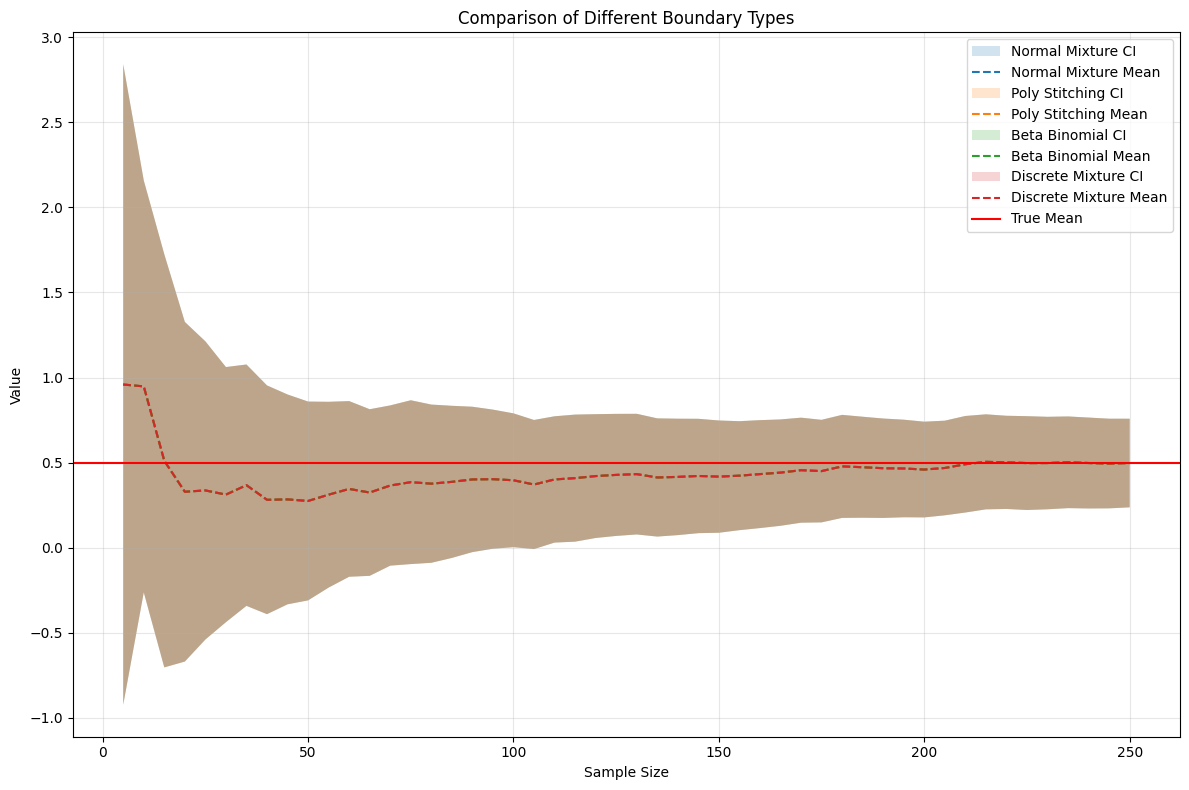

In [15]:
compare_boundaries()